In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/91886/OneDrive/Desktop/sociothon/transactions.csv")

In [3]:
print(df.head())

     Date      Time                   Transaction Details           Amount
0  24 Sep   1:46 AM            Money sent to Kartik Bajaj  -  Rs.66,600.00
1  24 Sep   1:46 AM            Money sent to Kartik Bajaj       -  Rs.1.00
2  23 Sep  10:57 PM  Recharge of Airtel Mobile 9899190100      -  Rs.22.00
3  23 Sep   7:45 PM                      Paid to All Mart     -  Rs.305.00
4  23 Sep   7:36 PM         Paid to Ilaiyaraja Lakshmanan     -  Rs.150.00


In [4]:
def trim_to_name(transaction):
    if "to " in transaction:
        return transaction.split("to ")[-1]
    elif "from " in transaction:
        return transaction.split("from ")[-1]
    elif "Recharge of " in transaction:
        return transaction.split("Recharge of ")[-1].split()[0] + " " + transaction.split("Recharge of ")[-1].split()[1]

    return transaction


In [5]:
df['Transaction Details'] = df['Transaction Details'].apply(trim_to_name)


In [6]:
print(df)

       Date      Time    Transaction Details           Amount
0    24 Sep   1:46 AM           Kartik Bajaj  -  Rs.66,600.00
1    24 Sep   1:46 AM           Kartik Bajaj       -  Rs.1.00
2    23 Sep  10:57 PM          Airtel Mobile      -  Rs.22.00
3    23 Sep   7:45 PM               All Mart     -  Rs.305.00
4    23 Sep   7:36 PM  Ilaiyaraja Lakshmanan     -  Rs.150.00
..      ...       ...                    ...              ...
154  28 Aug   8:41 PM              All Maart     -  Rs.360.00
155  27 Aug   8:10 PM           Pushkar Iyer      -  Rs.70.00
156  26 Aug   7:04 PM              Enzo Shop     -  Rs.375.00
157  26 Aug   5:15 PM           Grace Caters     -  Rs.102.00
158  26 Aug  12:10 AM           Sunsrai Mart     -  Rs.330.00

[159 rows x 4 columns]


In [7]:
def extract_amount_safe(amount):
    try:
        # Remove Rs. and spaces, then convert to float
        amount_value = amount.replace('Rs.', '').replace(',', '').strip()
        
        # Check if the amount is negative or positive and convert to float
        if '-' in amount:
            return -float(amount_value.replace('-', '').strip())
        elif '+' in amount:
            return float(amount_value.replace('+', '').strip())
        return float(amount_value)
    except ValueError:
        # If conversion fails, return None or NaN
        return None



In [8]:
df['Amount'] = df['Amount'].apply(extract_amount_safe)

In [9]:
print(df)

       Date      Time    Transaction Details   Amount
0    24 Sep   1:46 AM           Kartik Bajaj -66600.0
1    24 Sep   1:46 AM           Kartik Bajaj     -1.0
2    23 Sep  10:57 PM          Airtel Mobile    -22.0
3    23 Sep   7:45 PM               All Mart   -305.0
4    23 Sep   7:36 PM  Ilaiyaraja Lakshmanan   -150.0
..      ...       ...                    ...      ...
154  28 Aug   8:41 PM              All Maart   -360.0
155  27 Aug   8:10 PM           Pushkar Iyer    -70.0
156  26 Aug   7:04 PM              Enzo Shop   -375.0
157  26 Aug   5:15 PM           Grace Caters   -102.0
158  26 Aug  12:10 AM           Sunsrai Mart   -330.0

[159 rows x 4 columns]


In [15]:
print(df.describe())

             Amount
count    157.000000
mean    -594.112420
std     5529.984326
min   -66600.000000
25%     -212.000000
50%     -100.000000
75%      -50.000000
max     8426.000000


In [16]:
df.to_csv('transactions.csv', index=False)

In [19]:
print(df.head())

     Date      Time    Transaction Details   Amount
0  24 Sep   1:46 AM           Kartik Bajaj -66600.0
1  24 Sep   1:46 AM           Kartik Bajaj     -1.0
2  23 Sep  10:57 PM          Airtel Mobile    -22.0
3  23 Sep   7:45 PM               All Mart   -305.0
4  23 Sep   7:36 PM  Ilaiyaraja Lakshmanan   -150.0


In [20]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [10]:
import matplotlib.pyplot as plt

LINE CHART

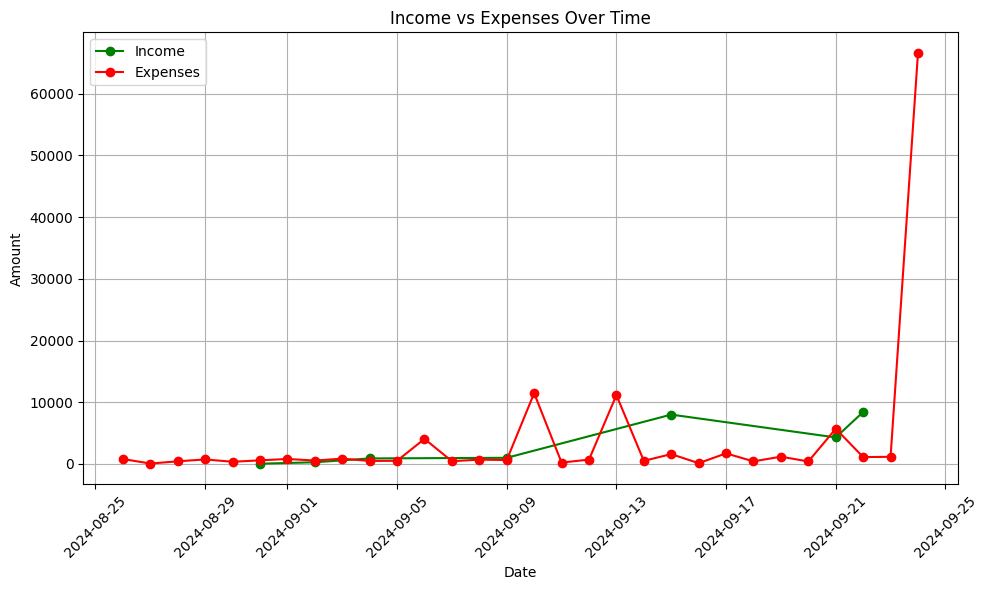

In [30]:
# Add a default year (e.g., 2024) to the 'Date' column and ensure it's in the correct format
df['Date'] = df['Date'] + ' 2024'  # Add a default year
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')  # Parse the date with the added year

# Separate income and expenses
income = df[df['Amount'] > 0].groupby('Date')['Amount'].sum()
expenses = df[df['Amount'] < 0].groupby('Date')['Amount'].sum().abs()  # Take absolute values for expenses

# Plot the line chart for income and expenses over time
plt.figure(figsize=(10, 6))

plt.plot(income.index, income.values, label='Income', color='green', marker='o')
plt.plot(expenses.index, expenses.values, label='Expenses', color='red', marker='o')

plt.title('Income vs Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping of tick labels

plt.show()


Pie chart

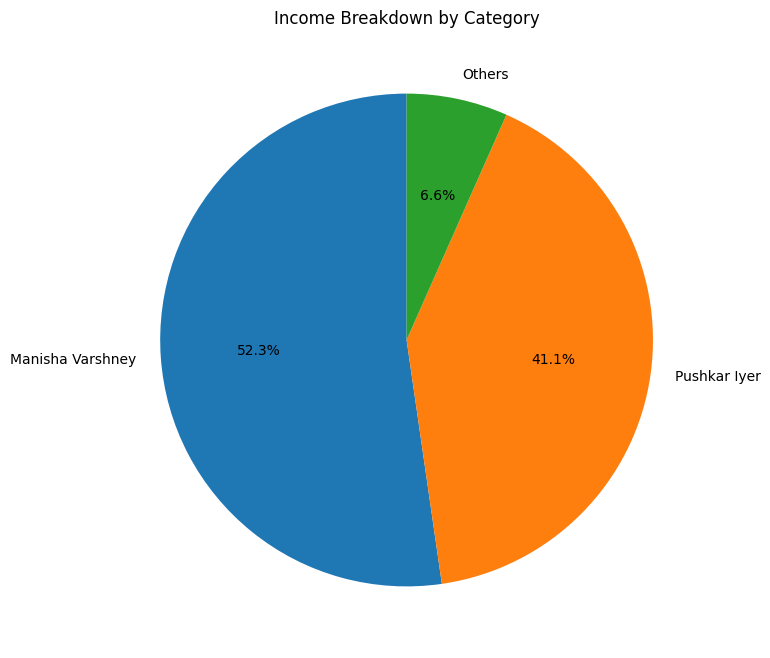

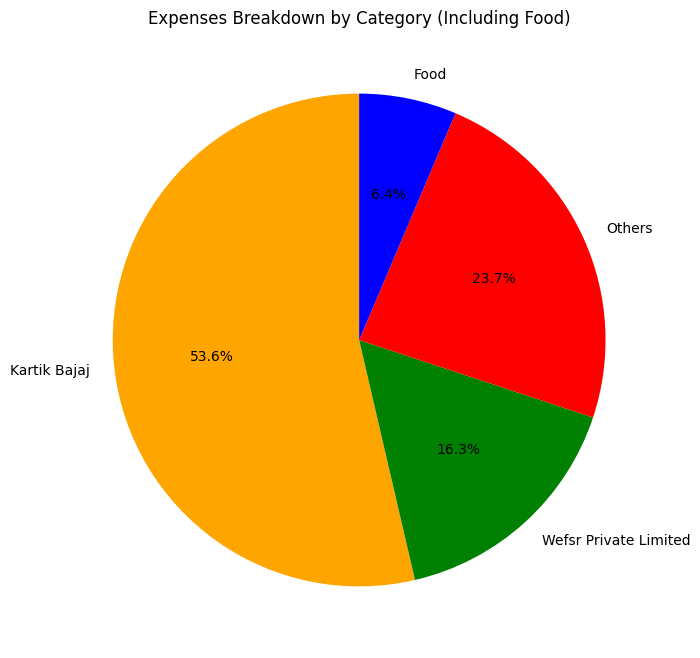

In [28]:
# List of 'Food Expenses' categories
food_expenses = ['Mc Donalds', 'Maggi Spot', 'Subway', 'Lava Cakes', 'Darling Enzo', 'Enzo Shop', 'All maart', 'All Mart']

# Define a function to categorize transactions
def categorize_expenses(transaction):
    if transaction in food_expenses:
        return 'Food'
    else:
        return transaction  # Keep other transaction details as they are

# Apply the categorization function to create a new column 'Category'
df['Category'] = df['Transaction Details'].apply(categorize_expenses)

# Separate income and categorized expenses
income = df[df['Amount'] > 0].groupby('Transaction Details')['Amount'].sum()
categorized_expenses = df[df['Amount'] < 0].groupby('Category')['Amount'].sum().abs()

# Calculate total for income and categorized expenses to find 10% threshold
total_income = income.sum()
total_categorized_expenses = categorized_expenses.sum()

income_threshold = 0.10 * total_income  # 10% of total income
expense_threshold = 0.10 * total_categorized_expenses  # 10% of total categorized expenses

# Group small income categories into 'Others'
small_income_categories = income[income < income_threshold]
large_income_categories = income[income >= income_threshold]
large_income_categories['Others'] = small_income_categories.sum()

# Group small categorized expenses into 'Others'
small_categorized_expenses = categorized_expenses[categorized_expenses < expense_threshold]
large_categorized_expenses = categorized_expenses[categorized_expenses >= expense_threshold]
large_categorized_expenses['Others'] = small_categorized_expenses.sum()

# Ensure 'Food' is included as a distinct category in expenses
if 'Food' not in large_categorized_expenses.index and 'Food' in categorized_expenses.index:
    large_categorized_expenses['Food'] = categorized_expenses['Food']

# Plot Income Pie Chart
plt.figure(figsize=(8, 8))
large_income_categories.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Income Breakdown by Category')
plt.ylabel('')  # Remove default ylabel
plt.show()

# Plot Categorized Expenses Pie Chart
plt.figure(figsize=(8, 8))
large_categorized_expenses.plot.pie(autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'red', 'blue', 'purple'])
plt.title('Expenses Breakdown by Category (Including Food)')
plt.ylabel('')  # Remove default ylabel
plt.show()



Line Chart 

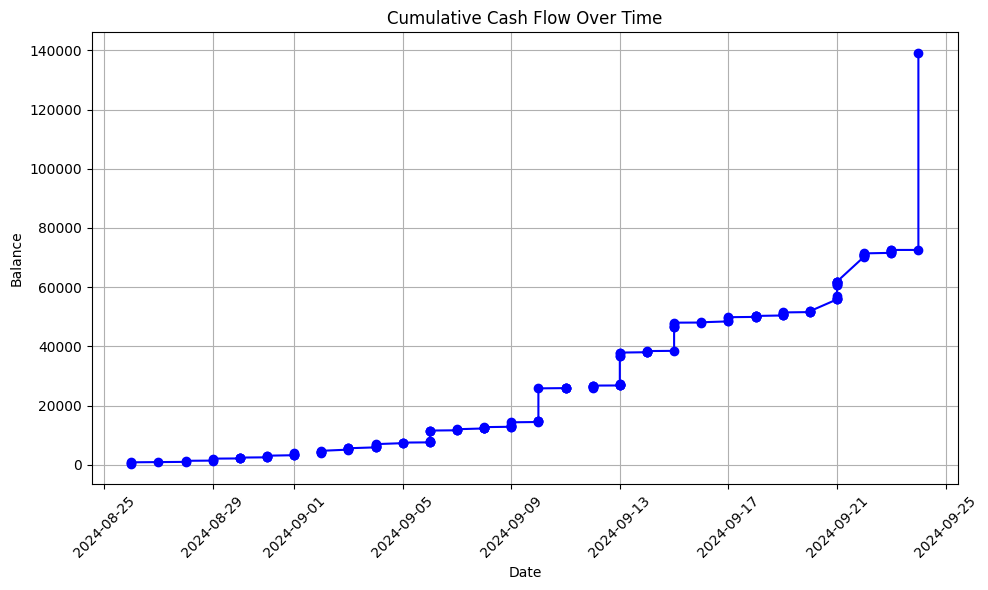

In [39]:

df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by 'Date' to ensure transactions are in chronological order
df = df.sort_values(by='Date')

# Calculate the cumulative sum of 'Amount' to track cash flow over time
df['Cumulative Balance'] = df['Amount'].cumsum()

# Plot the cumulative cash flow
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Cumulative Balance'], color='blue', marker='o')

# Formatting the plot
plt.title('Cumulative Cash Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.tight_layout()

# Show the plot
plt.show()

Donut Chart

In [58]:
df1 = pd.read_csv('transactions.csv')

# Preview the data
print(df1.head())

     Date      Time    Transaction Details   Amount
0  24 Sep   1:46 AM           Kartik Bajaj -66600.0
1  24 Sep   1:46 AM           Kartik Bajaj     -1.0
2  23 Sep  10:57 PM          Airtel Mobile    -22.0
3  23 Sep   7:45 PM               All Mart   -305.0
4  23 Sep   7:36 PM  Ilaiyaraja Lakshmanan   -150.0


In [59]:
# Create a new column 'Type' to classify as 'Income' or 'Expense'
df1['Type'] = df1['Amount'].apply(lambda x: 'Income' if x > 0 else 'Expense')

# Create a new DataFrame only for the donut chart analysis
df_donut = df1[['Amount', 'Type']]

# Preview the new DataFrame
print(df_donut.head())


    Amount     Type
0 -66600.0  Expense
1     -1.0  Expense
2    -22.0  Expense
3   -305.0  Expense
4   -150.0  Expense


In [60]:
# Calculate the total income and total expenses
total_income = df_donut[df_donut['Type'] == 'Income']['Amount'].sum()
total_expenses = abs(df_donut[df_donut['Type'] == 'Expense']['Amount'].sum())  # Use abs() to get positive value for expenses

# Display the calculated totals
print(f"Total Income: {total_income}")
print(f"Total Expenses: {total_expenses}")


Total Income: 22950.19
Total Expenses: 116225.84000000001


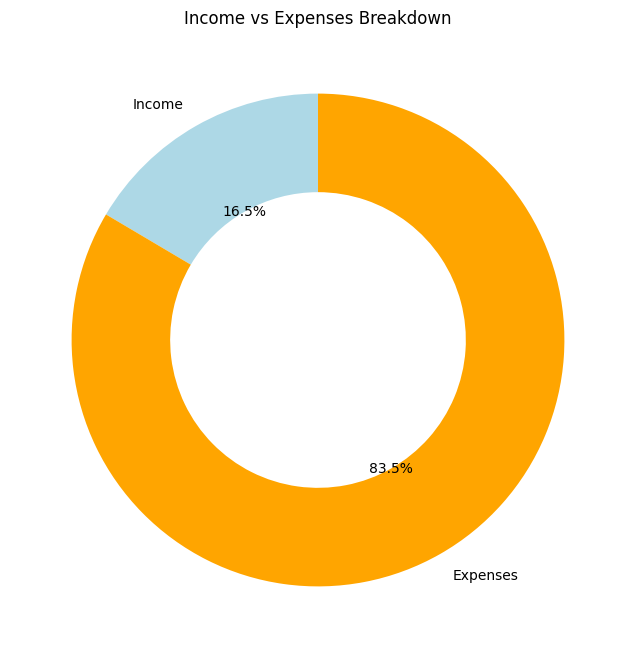

In [61]:
labels = ['Income', 'Expenses']
sizes = [total_income, total_expenses]
colors = ['lightblue', 'orange']

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
plt.title('Income vs Expenses Breakdown')
plt.show()

HeatMap 

In [62]:
# Reload the original dataset
df = pd.read_csv('transactions.csv')

# Convert 'Date' and 'Time' to datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d %b %I:%M %p', errors='coerce')

# Create columns for day of the month and hour of the day
df['day_of_month'] = df['datetime'].dt.day
df['hour_of_day'] = df['datetime'].dt.hour

# Filter only the debit (expenses) transactions
df_expenses = df[df['Amount'] < 0]

# Group by day of the month and hour of the day, summing the expenses
heatmap_data = df_expenses.groupby(['day_of_month', 'hour_of_day'])['Amount'].sum().abs().unstack().fillna(0)

# Preview the heatmap data
print(heatmap_data.head())


hour_of_day      0      1    9    10     11     12     13   14   15     16  \
day_of_month                                                                 
1               0.0  450.0  0.0  0.0    0.0    0.0  262.0  0.0  0.0  100.0   
2               0.0    0.0  0.0  0.0    0.0    0.0    0.0  0.0  0.0    0.0   
3               0.0    0.0  0.0  0.0    0.0    0.0    0.0  0.0  0.0  640.0   
4               0.0    0.0  0.0  0.0  150.0  157.0    0.0  0.0  0.0    0.0   
5             325.0    0.0  0.0  0.0    0.0    0.0    0.0  0.0  0.0  120.0   

hour_of_day      17     18    19   20   21   22   23  
day_of_month                                          
1               0.0    0.0   0.0  0.0  0.0  0.0  0.0  
2             175.0  382.0   0.0  0.0  0.0  0.0  0.0  
3             146.0    0.0  80.0  0.0  0.0  0.0  0.0  
4             105.0    0.0  80.0  0.0  0.0  0.0  0.0  
5               0.0   75.0   0.0  0.0  0.0  0.0  0.0  


In [63]:
import seaborn as sns

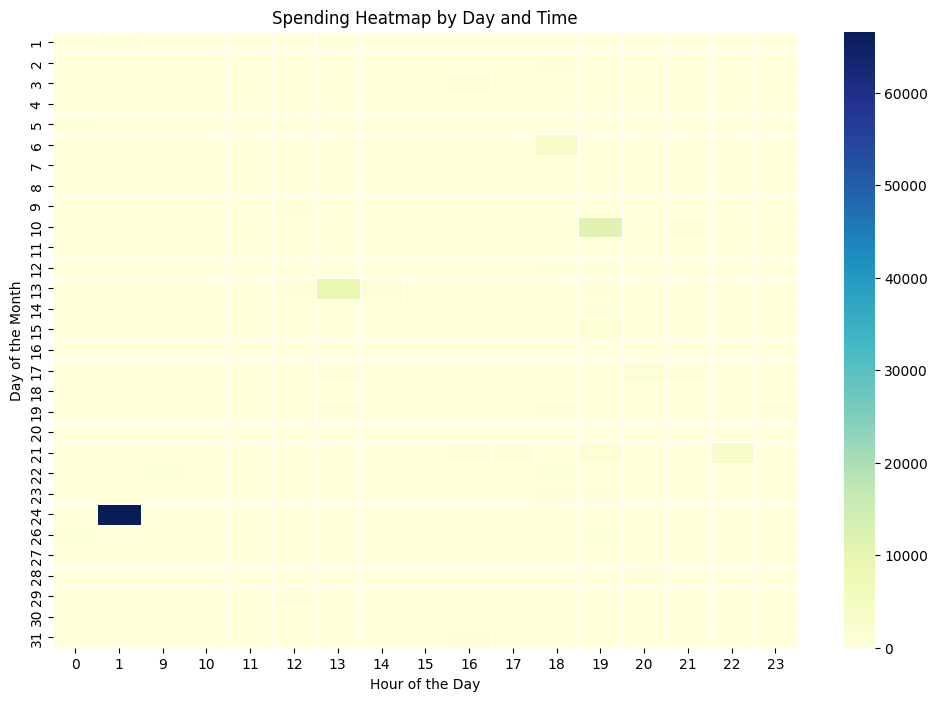

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=False)

# Add labels and title
plt.title('Spending Heatmap by Day and Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')

# Display the heatmap
plt.show()

Bar Chart

In [66]:
df = pd.read_csv('transactions.csv')

# Ensure that 'Date' and 'Time' are in datetime format
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d %b %I:%M %p', errors='coerce')

# Create a 'Type' column to differentiate income and expenses
df['Type'] = df['Amount'].apply(lambda x: 'Credit' if x > 0 else 'Debit')

# Convert 'Amount' for 'Debit' to positive for visualization purposes
df.loc[df['Type'] == 'Debit', 'Amount'] = -df['Amount']

# Group data by week and type (Credit or Debit)
weekly_data = df.resample('W-Mon', on='datetime')['Amount'].sum().unstack('Type').fillna(0)

# Preview the grouped data
print(weekly_data.head())

KeyError: 'Requested level (Type) does not match index name (datetime)'